<a href="https://colab.research.google.com/github/twishi03/scRNA/blob/main/scLabel_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/mousepixels/sanbomics_scripts/blob/main/scvi_label_transfer.ipynb

In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 8.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=68c982a2a17dc530cce72b56d60e546b13add0b0102e8

In [ ]:
!pip install scvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scvi-0.6.8-py2.py3-none-any.whl (158 kB)
  Using cached scikit_misc-0.1.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (8.8 MB)


In [ ]:
import scanpy as sc

In [ ]:
import scvi

/usr/local/lib/python3.8/dist-packages/scvi/__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


In [ ]:
ref_data = sc.read_h5ad('/content/pbmcref.h5ad')

In [ ]:
ref_data.obs

,n_genes,n_counts,orig_ident,stim,cluster,Donor
index,,,,,,
CTRL_AAACATACATTTCC.1,878.0,3018.0,CTRL,CTRL,CD14 Mono,SNG-1016
CTRL_AAACATACCAGAAA.1,713.0,2481.0,CTRL,CTRL,CD14 Mono,SNG-1256
CTRL_AAACATACCTCGCT.1,850.0,3420.0,CTRL,CTRL,CD14 Mono,SNG-1256
CTRL_AAACATACGGCATT.1,558.0,1582.0,CTRL,CTRL,CD14 Mono,SNG-1015
CTRL_AAACATTGCTTCGC.1,669.0,2536.0,CTRL,CTRL,CD14 Mono,SNG-1256
...,...,...,...,...,...,...
STIM_TCCCGAACTTCGTT.1,702.0,4222.0,STIM,STIM,Eryth,SNG-1015
STIM_TCGGACCTATCAGC.1,502.0,2050.0,STIM,STIM,Eryth,SNG-101
STIM_TGACGCCTCTTGTT.1,899.0,7168.0,STIM,STIM,Eryth,SNG-1015


In [ ]:
adata = sc.read_h5ad('/content/pbmc.h5ad')
adata.obs

""
Cells
AAACCCAAGGAGAGTA-1
AAACGCTTCAGCCCAG-1
AAAGAACAGACGACTG-1
AAAGAACCAATGGCAG-1
AAAGAACGTCTGCAAT-1
...
TTTCCTCTCTCTTGCG-1
TTTGATCTCTTTGGAG-1
TTTGGTTAGTAACCTC-1


In [ ]:
adata

AnnData object with n_obs × n_vars = 1087 × 15099

In [ ]:
adata.var_names_make_unique()

In [ ]:
adata = adata.concatenate(ref_data)
adata.obs

/usr/local/lib/python3.8/dist-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


,n_genes,n_counts,orig_ident,stim,cluster,Donor,batch
AAACCCAAGGAGAGTA-1-0,NaN,NaN,NaN,NaN,NaN,NaN,0
AAACGCTTCAGCCCAG-1-0,NaN,NaN,NaN,NaN,NaN,NaN,0
AAAGAACAGACGACTG-1-0,NaN,NaN,NaN,NaN,NaN,NaN,0
AAAGAACCAATGGCAG-1-0,NaN,NaN,NaN,NaN,NaN,NaN,0
AAAGAACGTCTGCAAT-1-0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
STIM_TCCCGAACTTCGTT.1-1,702.0,4222.0,STIM,STIM,Eryth,SNG-1015,1
STIM_TCGGACCTATCAGC.1-1,502.0,2050.0,STIM,STIM,Eryth,SNG-101,1
STIM_TGACGCCTCTTGTT.1-1,899.0,7168.0,STIM,STIM,Eryth,SNG-1015,1
STIM_TGGTCAGACAAGCT.1-1,550.0,4225.0,STIM,STIM,Eryth,SNG-1039,1


In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                            layer = "counts", batch_key="batch", subset = True)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
!pip install scvi-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#adata

AnnData object with n_obs × n_vars = 14923 × 2000
    obs: 'n_genes', 'n_counts', 'orig_ident', 'stim', 'cluster', 'Donor', 'batch'
    var: 'gene.mean-1', 'gene.dispersion-1', 'gene.dispersion.scaled-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [ ]:
import scvi

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                            layer = "counts", batch_key="batch", subset = True)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
!pip install scvi-tools
!pip install scikit-misc
!pip install scanpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 KB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 KB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/

In [ ]:
adata

AnnData object with n_obs × n_vars = 14923 × 2000
    obs: 'n_genes', 'n_counts', 'orig_ident', 'stim', 'cluster', 'Donor', 'batch'
    var: 'gene.mean-1', 'gene.dispersion-1', 'gene.dispersion.scaled-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [ ]:
!pip install --quiet scvi-colab
!pip install --quiet scib-metrics
from scvi_colab import install

install()

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

AttributeError: ignored

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                            layer = "counts", batch_key="batch", subset = True)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key='batch')
vae = scvi.model.SCVI(adata)
vae.train()

AttributeError: ignored

In [ ]:
model = scvi.model.SCVI(adata)

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key='batch')
vae = scvi.model.SCVI(adata)
vae.train()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/scvi/distributions/_negative_binomial.py:481: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 400/400: 100%|██████████| 400/400 [09:55<00:00,  1.34s/it, loss=564, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [09:55<00:00,  1.49s/it, loss=564, v_num=1]


In [ ]:
adata.obs['cluster'] = adata.obs['cluster'].cat.add_categories('Unknown')
adata.obs = adata.obs.fillna(value = {'cluster': 'Unknown'})
adata.obs

,n_genes,n_counts,orig_ident,stim,cluster,Donor,batch,_scvi_batch,_scvi_labels
AAACCCAAGGAGAGTA-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,0
AAACGCTTCAGCCCAG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,0
AAAGAACAGACGACTG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,0
AAAGAACCAATGGCAG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,0
AAAGAACGTCTGCAAT-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...
STIM_TCCCGAACTTCGTT.1-1,702.0,4222.0,STIM,STIM,Eryth,SNG-1015,1,1,0
STIM_TCGGACCTATCAGC.1-1,502.0,2050.0,STIM,STIM,Eryth,SNG-101,1,1,0
STIM_TGACGCCTCTTGTT.1-1,899.0,7168.0,STIM,STIM,Eryth,SNG-1015,1,1,0
STIM_TGGTCAGACAAGCT.1-1,550.0,4225.0,STIM,STIM,Eryth,SNG-1039,1,1,0


In [ ]:
#adata.obs.tail()

,n_genes,n_counts,orig_ident,stim,cluster,Donor,batch,_scvi_batch,_scvi_labels
STIM_TCCCGAACTTCGTT.1-1,702.0,4222.0,STIM,STIM,Eryth,SNG-1015,1,1,0
STIM_TCGGACCTATCAGC.1-1,502.0,2050.0,STIM,STIM,Eryth,SNG-101,1,1,0
STIM_TGACGCCTCTTGTT.1-1,899.0,7168.0,STIM,STIM,Eryth,SNG-1015,1,1,0
STIM_TGGTCAGACAAGCT.1-1,550.0,4225.0,STIM,STIM,Eryth,SNG-1039,1,1,0
STIM_TGTGAGTGTCTTAC.1-1,607.0,2804.0,STIM,STIM,Eryth,SNG-1256,1,1,0


In [ ]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata, unlabeled_category = 'Unknown',
                                        labels_key = 'cluster')

lvae.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


/usr/local/lib/python3.8/dist-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/scvi/distributions/_negative_binomial.py:481: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/20: 100%|██████████| 20/20 [00:56<00:00,  2.64s/it, loss=634, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:56<00:00,  2.82s/it, loss=634, v_num=1]


In [ ]:
adata.obs['predicted'] = lvae.predict(adata)
adata.obs

,n_genes,n_counts,orig_ident,stim,cluster,Donor,batch,_scvi_batch,_scvi_labels,predicted
AAACCCAAGGAGAGTA-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,13,CD14 Mono
AAACGCTTCAGCCCAG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,13,B
AAAGAACAGACGACTG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,13,CD8 T
AAAGAACCAATGGCAG-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,13,CD8 T
AAAGAACGTCTGCAAT-1-0,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,13,CD4 Memory T
...,...,...,...,...,...,...,...,...,...,...
STIM_TCCCGAACTTCGTT.1-1,702.0,4222.0,STIM,STIM,Eryth,SNG-1015,1,1,8,CD14 Mono
STIM_TCGGACCTATCAGC.1-1,502.0,2050.0,STIM,STIM,Eryth,SNG-101,1,1,8,Mk
STIM_TGACGCCTCTTGTT.1-1,899.0,7168.0,STIM,STIM,Eryth,SNG-1015,1,1,8,CD16 Mono
STIM_TGGTCAGACAAGCT.1-1,550.0,4225.0,STIM,STIM,Eryth,SNG-1039,1,1,8,Mk


In [ ]:
adata.obs['bc2'] = adata.obs.index.map(lambda x: x[:-2])

cell_mapper = dict(zip(adata.obs.bc2, adata.obs.predicted))

In [ ]:
cell_mapper

{'AAACCCAAGGAGAGTA-1': 'CD14 Mono',
 'AAACGCTTCAGCCCAG-1': 'B',
 'AAAGAACAGACGACTG-1': 'CD8 T',
 'AAAGAACCAATGGCAG-1': 'CD8 T',
 'AAAGAACGTCTGCAAT-1': 'CD4 Memory T',
 'AAAGGATAGTAGACAT-1': 'B',
 'AAAGGATCACCGGCTA-1': 'B',
 'AAAGGATTCAGCTTGA-1': 'CD14 Mono',
 'AAAGGATTCCGTTTCG-1': 'CD14 Mono',
 'AAAGGGCTCATGCCCT-1': 'CD4 Naive T',
 'AAAGGGCTCCGTAGGC-1': 'CD8 T',
 'AAAGGTACAACTGCTA-1': 'CD16 Mono',
 'AAAGTCCAGCGGGTTA-1': 'CD4 Naive T',
 'AAAGTCCCACCAGCCA-1': 'B',
 'AAAGTGATCGTACACA-1': 'NK',
 'AAATGGAAGCCGCTTG-1': 'CD14 Mono',
 'AAATGGACAATGCTCA-1': 'DC',
 'AAATGGAGTACCGCGT-1': 'CD8 T',
 'AAATGGATCCTATTTG-1': 'B',
 'AACAAAGGTGATGAAT-1': 'CD4 Memory T',
 'AACAACCAGTAGTCCT-1': 'CD14 Mono',
 'AACAACCCACGCTATA-1': 'CD8 T',
 'AACAAGAGTTATAGAG-1': 'CD16 Mono',
 'AACAGGGGTGGGAGAG-1': 'CD8 T',
 'AACCAACAGCTTGTTG-1': 'T activated',
 'AACCCAACAACTGATC-1': 'CD8 T',
 'AACCCAAGTGGGCTTC-1': 'B',
 'AACCCAATCTTACCGC-1': 'NK',
 'AACCTGACATCCTATT-1': 'CD14 Mono',
 'AACCTTTGTTTCGGCG-1': 'NK',
 'AACGAAAAGG

In [ ]:
#map back onto raw adata
adata = sc.read_h5ad('/content/pbmc.h5ad')
adata.var_names_make_unique()

In [ ]:
adata.obs['cell_type'] = adata.obs.index.map(cell_mapper)
adata.obs

,cell_type
Cells,
AAACCCAAGGAGAGTA-1,CD14 Mono
AAACGCTTCAGCCCAG-1,B
AAAGAACAGACGACTG-1,CD8 T
AAAGAACCAATGGCAG-1,CD8 T
AAAGAACGTCTGCAAT-1,CD4 Memory T
...,...
TTTCCTCTCTCTTGCG-1,CD16 Mono
TTTGATCTCTTTGGAG-1,CD4 Naive T
TTTGGTTAGTAACCTC-1,CD8 T


In [ ]:
import numpy as np
def pp(adata):
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
    adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
    adata = adata[adata.obs.pct_counts_mt < 20]
    sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI
    sc.pp.log1p(adata) #change to log counts
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
    adata.raw = adata #save raw data before processing values and further filtering
    adata = adata[:, adata.var.highly_variable] #filter highly variable
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) #Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed
    sc.pp.scale(adata, max_value=10) #scale each gene to unit variance
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
    sc.tl.umap(adata)
    return adata

In [ ]:
adata = pp(adata)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


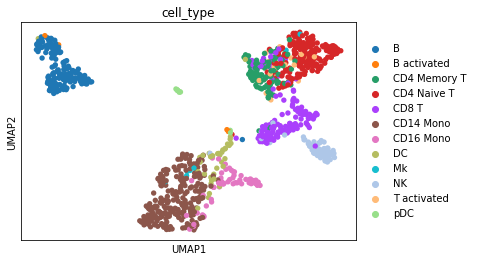

In [ ]:
sc.pl.umap(adata, color = 'cell_type')

In [ ]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = 'CD3E')

NameError: ignored

In [ ]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

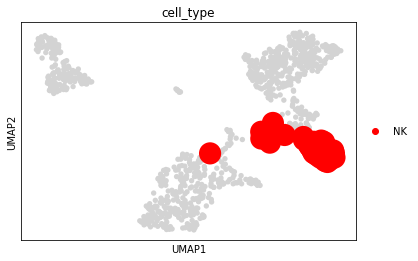

In [ ]:
ax = sc.pl.umap(adata, show = False)

sc.pl.umap(adata[adata.obs.cell_type.str.contains('NK')], palette = ['red'], color = 'cell_type', ax = ax)

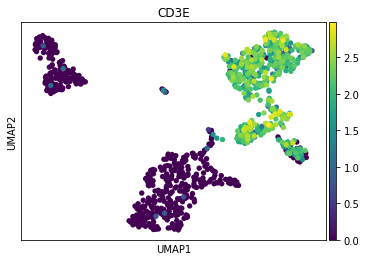

In [ ]:
sc.pl.umap(adata, color = 'CD3E')

In [ ]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


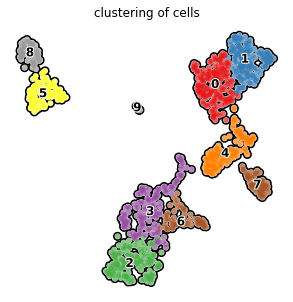

In [ ]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


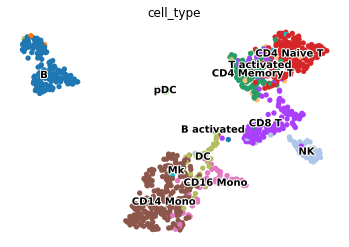

In [ ]:
sc.pl.umap(adata, color='cell_type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

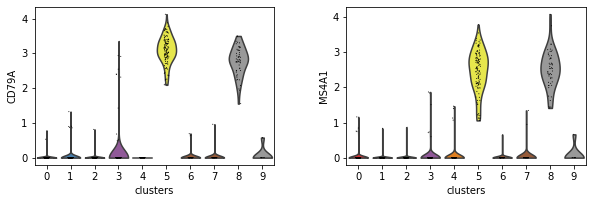

In [ ]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(adata, ['CD79A', 'MS4A1'], groupby='clusters' )

In [ ]:
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],

    'T-cell': ['CD3D'],
}

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


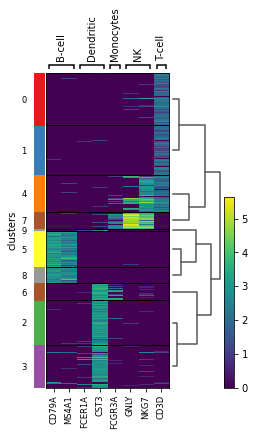

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


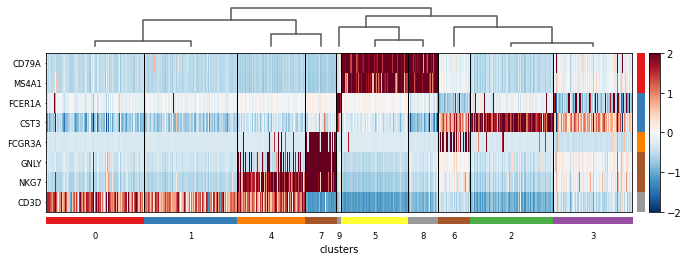

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes_dict, groupby='clusters', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))


categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


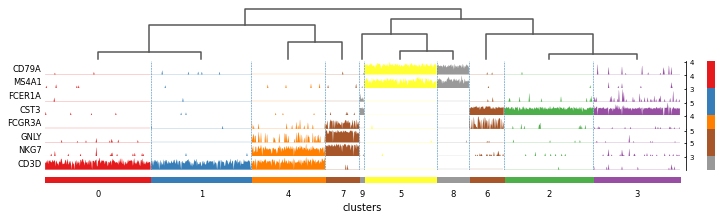

In [ ]:
ax = sc.pl.tracksplot(adata, marker_genes_dict, groupby='clusters', dendrogram=True)